<div style="background-color: teal; padding: 10px;">
    <h2>Sales Data Analysis</h2>
</div>

The objectives of this analysis is to find insightful trends existing in the Sales data. The dataset comprises of the sales from various devices in the year 2019 with a record of the Order ID, Products, Quantity Ordered, the address and also the time of purchase. 

The analysis is carried out by Data Cleaning, Data Exploration and Data Anlaysis and displaying Insights garnered utilizing common python packages like Pandas, Seaborn and Matplotliib.


In [1]:
# Import Packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data Source into DataFrame

# Data Source on GitHub
url = 'https://raw.githubusercontent.com/Rennyunit/git_practice/main/Sales_data.ftr'

# Use Pandas to read data source into a DataFrame
df = pd.read_feather(url)

<div style="background-color: teal; padding: 10px;">
    <h3>| Data Inspection</h3>
</div>

In [3]:
# Check data types and structure

print(df.dtypes,'\n')
print(df.head(),'\n')
print(df.columns,'\n')
print(df.shape)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object 

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1     None                        None             None       None   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1            None                                  None  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   

Index(['Order ID', 'Product', 'Quantity Ordered', '

<div style="background-color: teal; padding: 10px;">
    <h3>| Data Cleaning: Missing and Duplicated Data</h3>
</div>

#### The dataset has to be queried for missing (null) and duplicated data to avoid erroneous analysis.

In [1]:
# Check for missing data

null_data  = df.isnull().sum()
print(null_data)

missing_data = null_data[0]/len(df)*100
print(f"\nThe missing data is {missing_data:.2f}% of the total dataframe and missing across all columns. Therefore, removing this from the dataframe would have insignificant impact on the analysis.")

NameError: name 'df' is not defined

In [5]:
# Drop all missing data across columns and update dataframe

df.dropna(how = 'all',inplace = True)
print(df.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [6]:
# Check for duplicated data

duplicated_data = df.duplicated().sum()
print(f"\n There are {duplicated_data} duplicate rows in the dataframe.\n")
print(df[df.duplicated()])


 There are 618 duplicate rows in the dataframe.

        Order ID                     Product  Quantity Ordered  Price Each  \
31        176585  Bose SoundSport Headphones                 1       99.99   
1149    Order ID                     Product  Quantity Ordered  Price Each   
1155    Order ID                     Product  Quantity Ordered  Price Each   
1302      177795    Apple Airpods Headphones                 1         150   
1684      178158        USB-C Charging Cable                 1       11.95   
...          ...                         ...               ...         ...   
186563  Order ID                     Product  Quantity Ordered  Price Each   
186632  Order ID                     Product  Quantity Ordered  Price Each   
186738  Order ID                     Product  Quantity Ordered  Price Each   
186782    259296    Apple Airpods Headphones                 1         150   
186785    259297    Lightning Charging Cable                 1       14.95   

            O

In [7]:
# Remove all duplicate rows

df.drop_duplicates(inplace = True)
print(df[df.duplicated()])


Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []


<div style="background-color: teal; padding: 10px;">
    <h3>Data Insights</h3>
</div>

<div style="background-color: #00AFAF; padding: 10px;">
    <h3>| Month with highest sales</h3>
</div>

In [8]:
# Check for row with erroneous data 

df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
# Use  row index to remove erroneous data

df.drop(519, inplace = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
#Convert Date to datetime type

df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%m/%d/%y %H:%M')

In [11]:
# Extract month from the Order Date column

df['Order Month'] = df['Order Date'].dt.month

In [12]:
# Create a Month column to show the month names instead of numbers

month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November',
12:'December'}
df['Month Name'] = df['Order Month'].map(month_dict)

In [13]:
# Change data types

df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [14]:
# Calculate the ampunt for each Sale
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [15]:
# Calculate Sales amount per month

monthly_sales = round(df.groupby(['Month Name', 'Order Month'])['Sales' ].sum()).reset_index().sort_values('Order Month').reset_index(drop = True)
monthly_sales

,Month Name,Order Month,Sales
0,January,1,1821413.0
1,February,2,2200078.0
2,March,3,2804973.0
3,April,4,3389218.0
4,May,5,3150616.0
5,June,6,2576280.0
6,July,7,2646461.0
7,August,8,2241083.0
8,September,9,2094466.0
9,October,10,3734778.0


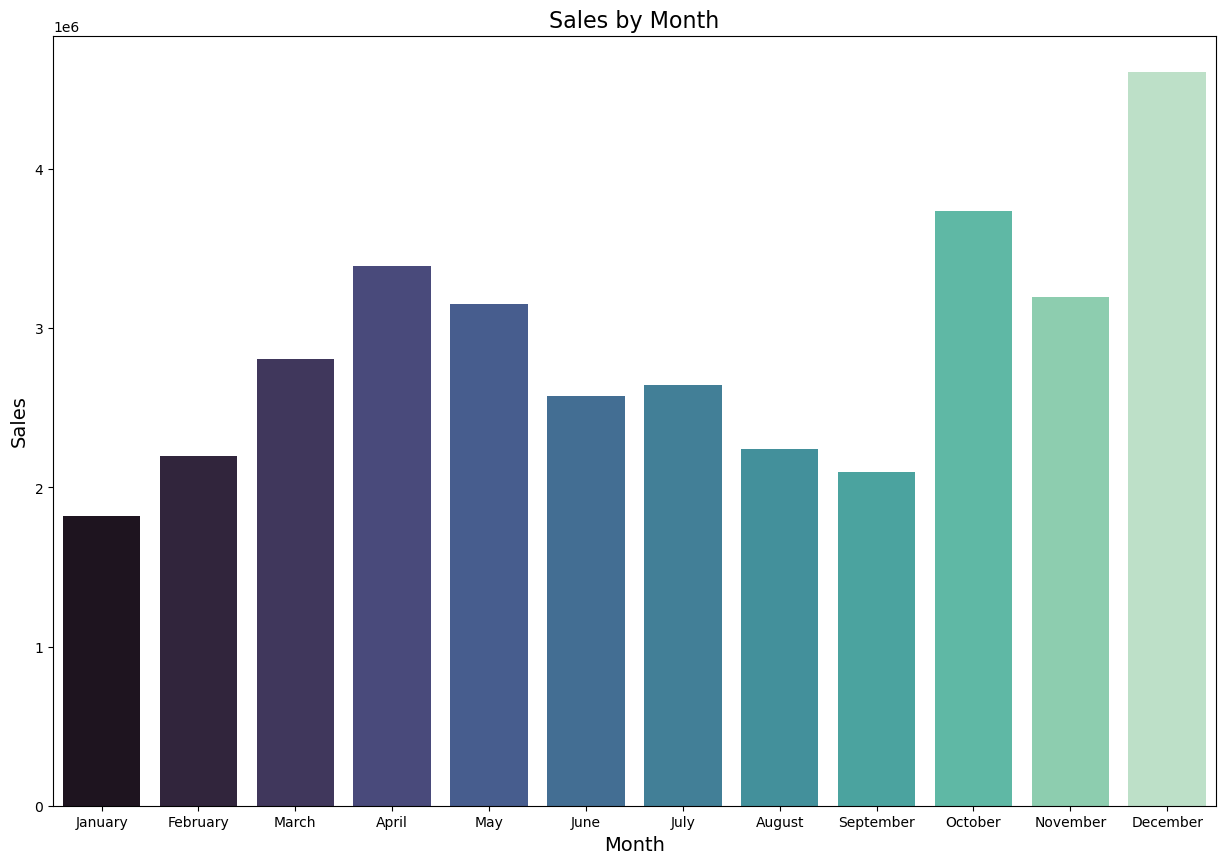

In [16]:
# Plot the Sales by Month

plt.figure(figsize = (15,10))
g = sns.barplot(x = 'Month Name', y= 'Sales', data = monthly_sales, palette = 'mako' )
g.set_title("Sales by Month", fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.show()

In [18]:
highest_sales_month = monthly_sales[monthly_sales['Sales'] == monthly_sales['Sales'].max()]
print(f"{highest_sales_month.iloc[0]['Month Name']} has the highest sales with a total value of {highest_sales_month.iloc[0]['Sales']:,.0f}.")

December has the highest sales with a total value of 4,608,296.


<div style="background-color: #00AFAF; padding: 10px;">
    <h3>| Most popular kind of products sold  </h3>
</div>

In [19]:
# Categorize the products
# Create a dictionary of products as keys and categories as values

cat_dict = {'USB-C Charging Cable' :'Charger', 'Bose SoundSport Headphones':'Headphone',
       'Google Phone': 'Phone', 'Wired Headphones':'Headphone', 'Macbook Pro Laptop':'Laptop',
       'Lightning Charging Cable':'Charger', '27in 4K Gaming Monitor': 'Monitor',
       'AA Batteries (4-pack)': 'Battery', 'Apple Airpods Headphones': 'Headphone',
       'AAA Batteries (4-pack)': 'Battery', 'iPhone': 'Phone', 'Flatscreen TV': 'Television',
       '27in FHD Monitor':'Monitor', '20in Monitor':'Monitor', 'LG Dryer':'Washing Machine', 'ThinkPad Laptop':'Laptop',
       'Vareebadd Phone': 'Phone', 'LG Washing Machine': 'Washing Machine', '34in Ultrawide Monitor':'Monitor'}


In [20]:
# Create new column by mapping the category dictionary

df['Category'] = df['Product'].map(cat_dict)

In [21]:
# Calculate Quantity of Product sold

quantity_product = round(df.groupby(['Category'])['Quantity Ordered' ].sum()).sort_values(ascending = False).reset_index()
quantity_product.head()

,Category,Quantity Ordered
0,Battery,58601
1,Headphone,49591
2,Charger,47100
3,Monitor,24098
4,Phone,14444


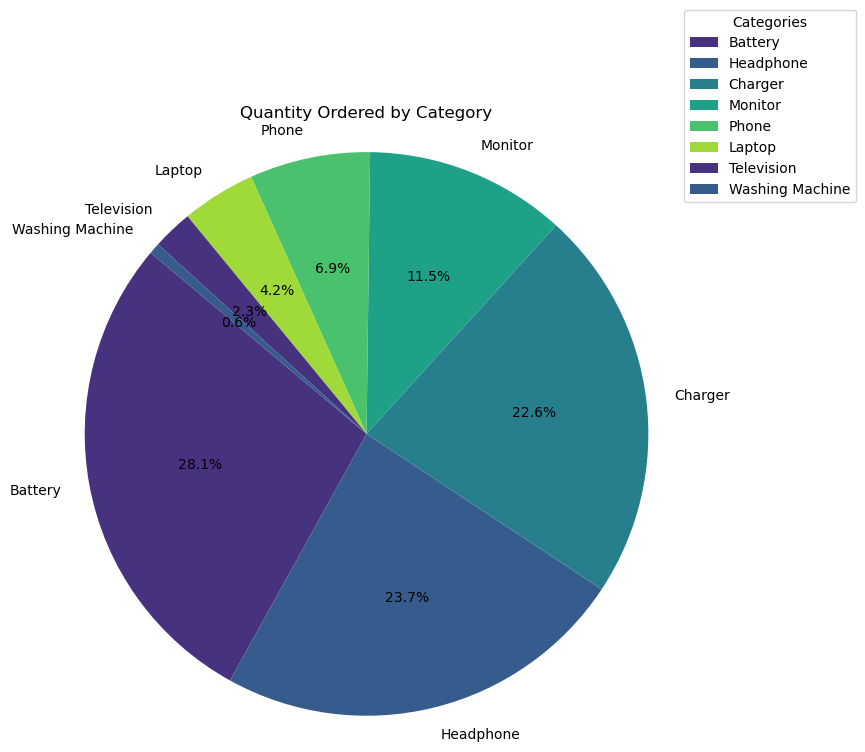

In [46]:
# Plot a chart showing the quantity ordered by category

plt.figure(figsize=(8, 8))
sns.set_palette('viridis')
plt.pie(quantity_product['Quantity Ordered'], labels=quantity_product['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Quantity Ordered by Category')
#title = plt.gca().title
title.set_position([0.5, 1.05])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(quantity_product['Category'], title="Categories", loc="upper right",bbox_to_anchor=(1.3, 1.2))
plt.show()



<div style="background-color: #00AFAF; padding: 10px;">
    <h3>| Order count by City</h3>
</div>

In [23]:
# Extract the City from the Purchase Address column using List comprehension

df['City'] = [i.split(',')[1] for i in df['Purchase Address'] ]

df_city = df.groupby('City')['Order ID'].nunique().reset_index()

df_city.head()

,City,Order ID
0,Atlanta,14253
1,Austin,9509
2,Boston,19092
3,Dallas,14240
4,Los Angeles,28498


In [169]:
# City with most orders

most_orders_city = df_city.sort_values('Order ID',ascending  = False).iloc[0]
most_orders_city

City         San Francisco
Order ID             42898
Name: 7, dtype: object

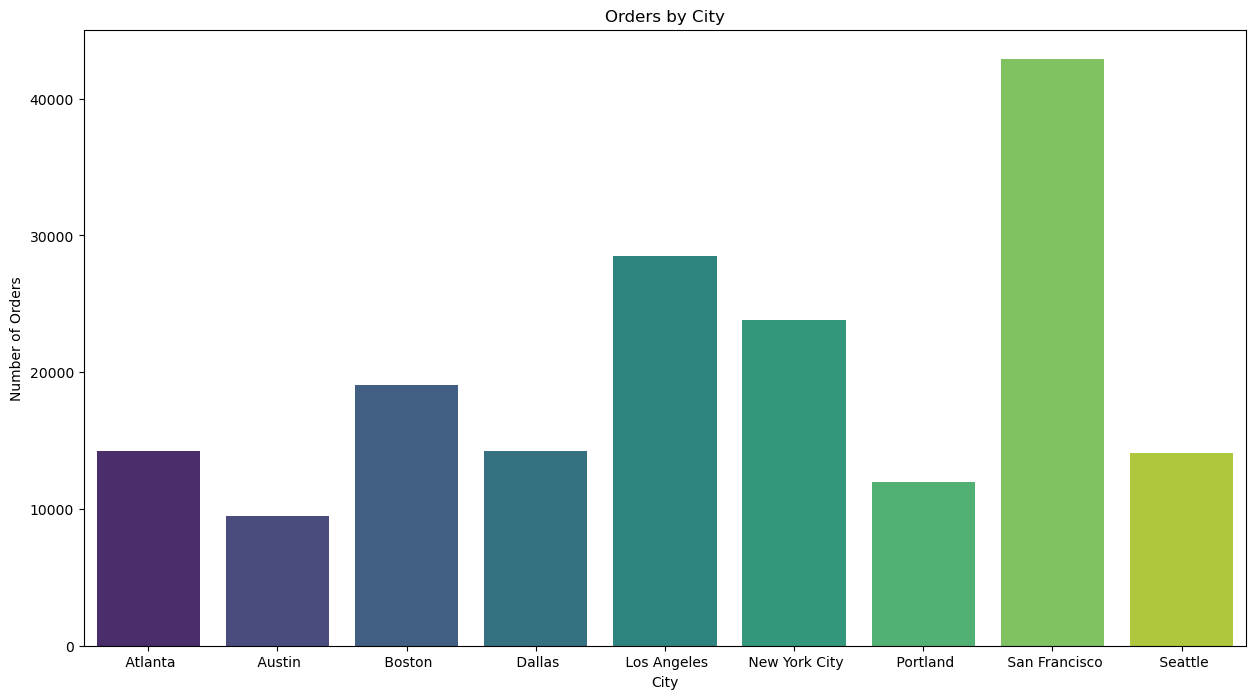

In [24]:
plt.figure(figsize=(15, 8))
sns.barplot(x ='City', y = 'Order ID', data=df_city, palette='viridis')
plt.title('Orders by City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.show()

<div style="background-color: #00AFAF; padding: 10px;">
    <h3>| Relationship between Quantity Ordered and Price Each</h3>
</div>

In [85]:
# Calculate the Total Quantity Ordered and Unit Price per product

product_count = df.groupby('Product')['Quantity Ordered','Price Each'].agg({'Quantity Ordered': 'sum', 'Price Each':'mean'})
product_count = product_count.reset_index()
product_count

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


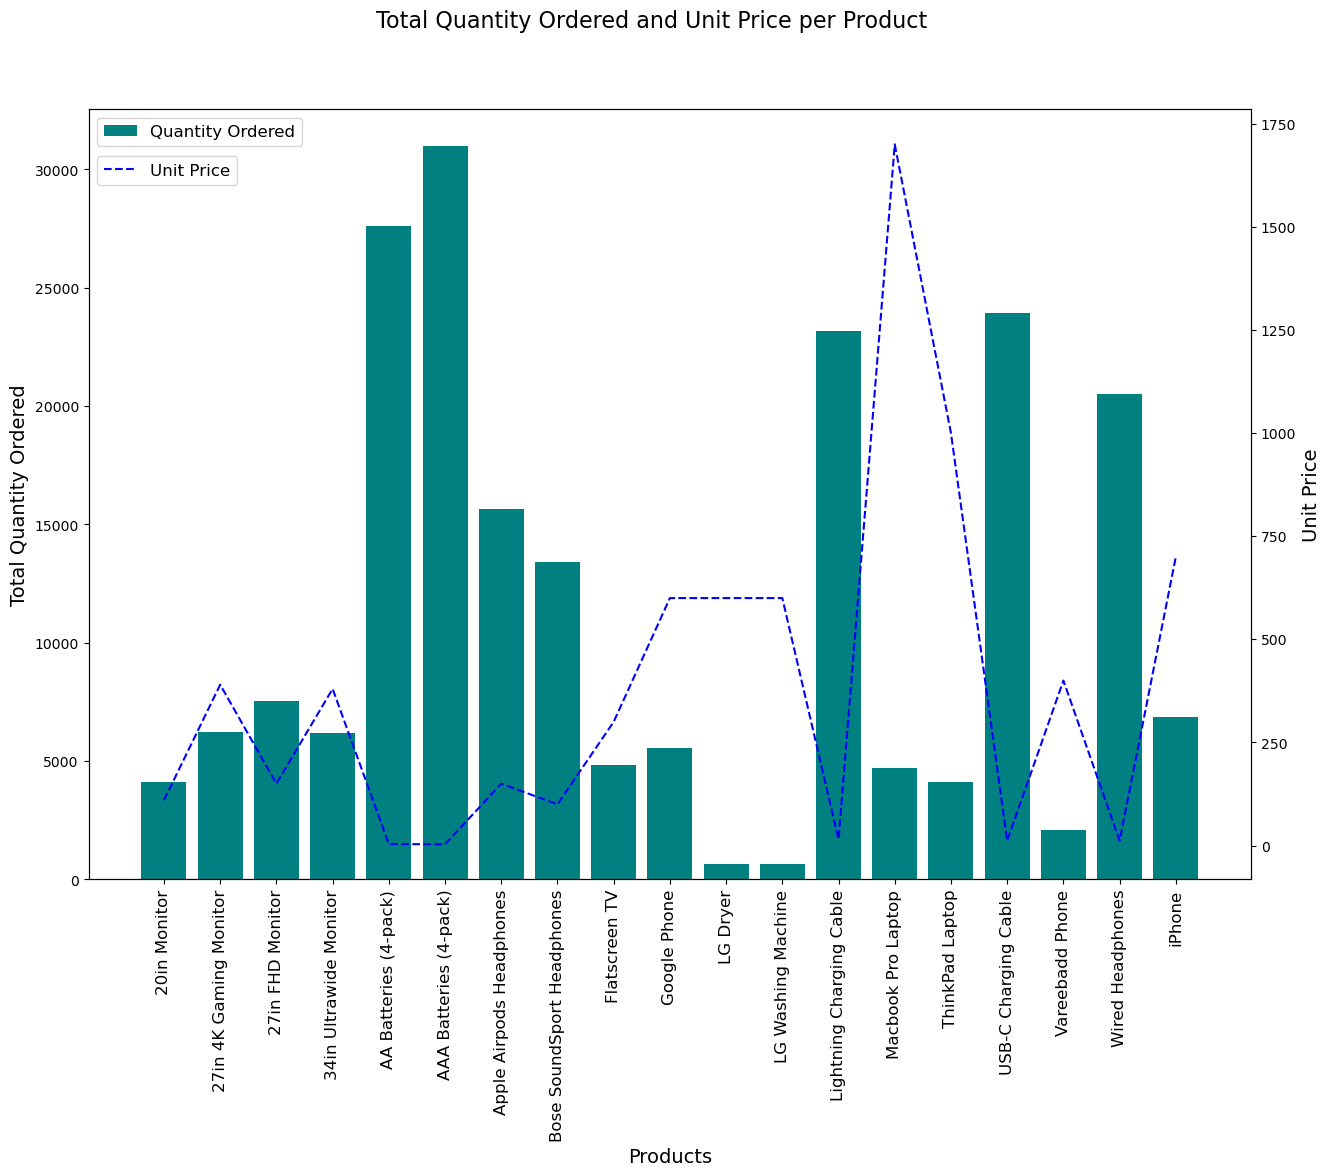

In [95]:
# Creating twin axes: Quantity Ordered and Unit Price

fig,ax1 = plt.subplots(figsize = (15,10))
ax2 = ax1.twinx()

# Create two plots on different axes
ax1.bar(product_count['Product'], product_count['Quantity Ordered'], color = 'teal', label = 'Quantity Ordered')
ax2.plot(product_count['Product'], product_count['Price Each'], 'b--', label = 'Unit Price')

# Set the labels for shared x-axis
ax1.set_xticklabels(product_count['Product'].values,rotation = 'vertical', fontsize = 12)
ax1.set_xlabel('Products', fontsize=14)

# Set the label for y-axis
ax1.set_ylabel('Total Quantity Ordered',fontsize=14)
ax2.set_ylabel('Unit Price', fontsize=14)

# Set legend position
ax1.legend(loc='upper left',bbox_to_anchor=(0,1), fontsize=12)
ax2.legend(loc='upper left',bbox_to_anchor=(0,0.95), fontsize=12)

# Set plot title
fig.suptitle('Total Quantity Ordered and Unit Price per Product', fontsize=16)

# Show plot
plt.show()

In [28]:
# Check for correlation between the price and quantity sold

most_sold_product = product_count[product_count['Quantity Ordered'] == product_count['Quantity Ordered'].max()].reset_index().iloc[0]['Product']


lowest_priced_product = product_count[product_count['Price Each'] == product_count['Price Each'].min()].reset_index().iloc[0]['Quantity Ordered']

print(f"The unit price of product is inversely related with the Quantity ordered which could be the reason why the {most_sold_product} has the lowest price {lowest_priced_product}.") 

The unit price of product is inversely related with the Quantity ordered which could be the reason why the AAA Batteries (4-pack) has the lowest price 30986.


In [29]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False).reset_index().iloc[0]

Product             AAA Batteries (4-pack)
Quantity Ordered                     30986
Name: 0, dtype: object

<div style="background-color: #00AFAF; padding: 10px;">
    <h3>| Common group purchases</h3>
</div>

In [30]:
# Check for items that are commonly purchased together

# Select all occurences of duplicated IDs 
order_groups = df[df['Order ID'].duplicated(keep =False)]

# Join all items with common Order ID
purchase_groups = order_groups.groupby('Order ID')['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns ={'Product': 'Groups'})

# Merge both dataframes
merged_orders =order_groups.merge(purchase_groups, how = 'left', on = 'Order ID')

In [99]:
merged_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Month Name,Sales,Category,City,Groups
0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Phone,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Headphone,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,600.00,Phone,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,11.95,Charger,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,5.98,Battery,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,September,3.84,Battery,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,11.99,Headphone,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,5.98,Battery,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,September,600.00,Phone,San Francisco,"Google Phone,USB-C Charging Cable"


In [31]:
# Remove all duplicates

purchase_groups_df= merged_orders.drop_duplicates(subset = ['Order ID'])
purchase_groups_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Month Name,Sales,Category,City,Groups
0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Phone,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,600.00,Phone,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,5.98,Battery,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,April,14.95,Charger,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,April,150.00,Headphone,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"


In [103]:
# Subset dataframe for the five (5) most common groups

most_common_groups = purchase_groups_df['Groups'].value_counts()[0:5].reset_index().rename(columns = {'index':'Groups', 'Groups':'Quantity Ordered'})
most_common_groups

,Groups,Quantity Ordered
0,"iPhone,Lightning Charging Cable",886
1,"Google Phone,USB-C Charging Cable",857
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303


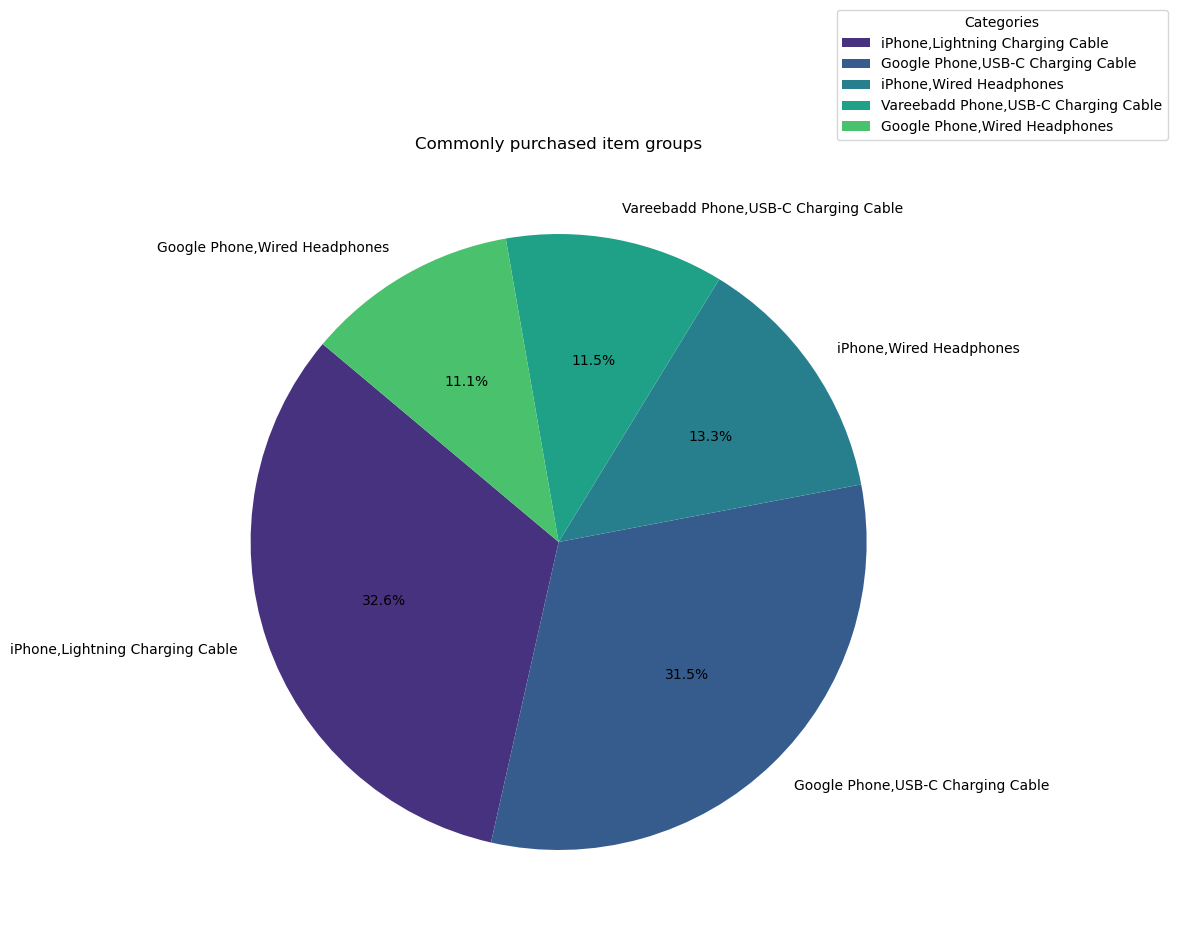

In [112]:
# Plot most common groups

plt.figure(figsize=(10, 10))
sns.set_palette('viridis')

plt.pie(most_common_groups['Quantity Ordered'], labels = most_common_groups['Groups'], autopct='%1.1f%%', startangle=140)

plt.title('Commonly purchased item groups')
plt.legend(title="Categories", loc="upper right",bbox_to_anchor=(1.3, 1.2))

plt.show()

<div style="background-color: #00AFAF; padding: 10px;">
    <h3>| Summary</h3>
</div>

In [173]:
summary = f""" The Sales data shows the following insights: 

- The dataset contains a total of {len(df):,} rows with columns {df.columns.to_list()} after data cleaning.

- The month of {highest_sales_month.iloc[0]['Month Name']} has the highest sales in the year and could be attributed to increased purchases during the holiday period. 
This increase in sales would require a proportionate increae in stock. 

- The three most ordered items: {quantity_product[:3]['Category'].tolist()} contribute to about {quantity_product[:3]['Quantity Ordered'].sum()/quantity_product['Quantity Ordered'].sum()*100:.0f}% of the total items sold. 

- The most sales occur in {most_orders_city[0]} with a total of {most_orders_city[1]:,} orders. This could be an insight for locating a new warehouse or an input in general logistics planning.

- {most_sold_product} is the most commonly sold item.

- The most common groups are {most_common_groups['Groups'].to_list()} which can be used as a basis for recommending products to the customer. An instance will be a recommendation of Lightning charging cable for someone who buys an iPhone and vice versa."""

print(summary)
    

 The Sales data shows the following insights: 

- The dataset contains a total of 185,686 rows with columns ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address', 'Order Month', 'Month Name', 'Sales', 'Category', 'City'] after data cleaning.

- The month of December has the highest sales in the year and could be attributed to increased purchases during the holiday period. 
This increase in sales would require a proportionate increae in stock. 

- The three most ordered items: ['Battery', 'Headphone', 'Charger'] contribute to about 74% of the total items sold. 

- The most sales occur in  San Francisco with a total of 42,898 orders. This could be an insight for locating a new warehouse or an input in general logistics planning.

- AAA Batteries (4-pack) is the most commonly sold item.

- The most common groups are ['iPhone,Lightning Charging Cable', 'Google Phone,USB-C Charging Cable', 'iPhone,Wired Headphones', 'Vareebadd Phone,USB-C Charging Cable'

In [ ]:
df_city.sort_values('Order ID', ascending  = False).reset_index(drop = True).iloc[0]['City']